<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

'mamba' is not recognized as an internal or external command,
operable program or batch file.


   ---------------------------------------- 0.0/153.3 kB ? eta -:--:--
   -- ------------------------------------- 10.2/153.3 kB ? eta -:--:--
   ------- ------------------------------- 30.7/153.3 kB 435.7 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/153.3 kB 762.6 kB/s eta 0:00:01
   ------------------------------ ------- 122.9/153.3 kB 901.1 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/153.3 kB 774.0 kB/s eta 0:00:01
   -------------------------------------- 153.3/153.3 kB 572.2 kB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled nbformat-5.9.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
anaconda-client 1.12.3 requires nbformat>=4.4.0, but you have nbformat 4.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 4.2.0 which is incompatible.
jupyter-server 2.10.0 requires nbformat>=5.3.0, but you have nbformat 4.2.0 which is incompatible.
nbclient 0.8.0 requires nbformat>=5.1, but you have nbformat 4.2.0 which is incompatible.
nbconvert 7.10.0 requires nbformat>=5.7, but you have nbformat 4.2.0 which is incompatible.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [1]:
import pandas as pd

def localize_datetime_index(data):
    # Check if the input is a DataFrame and has a datetime index or column
    if isinstance(data, pd.DataFrame):
        # Assume the first column is the datetime column if not set as index
        datetime_column = data.columns[0] if not isinstance(data.index, pd.DatetimeIndex) else data.index.name
        # Convert column to datetime if it's not already
        if not isinstance(data.index, pd.DatetimeIndex):
            data[datetime_column] = pd.to_datetime(data[datetime_column])
            data.set_index(datetime_column, inplace=True)
        
        # Attempt to localize timezone only if the index is a DatetimeIndex
        if isinstance(data.index, pd.DatetimeIndex):
            data.index = data.index.tz_localize('UTC', ambiguous='infer', nonexistent='shift_forward')
    elif isinstance(data, pd.Series):
        # Similar approach for Series objects
        if data.dtype == 'datetime64[ns]':
            data = data.dt.tz_localize('UTC', ambiguous='infer', nonexistent='shift_forward')
    return data


In [7]:
pip install --upgrade pandas yfinance


  Using cached frozendict-2.4.0-py3-none-any.whl
  Using cached peewee-3.17.1-py3-none-any.whl
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.6 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.4/11.6 MB 2.9 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.6 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.6 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.6 MB 2.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.6 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.6 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/11.6 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.2/11.6 MB 2.5 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.6 MB 2.4 MB/s 

In [2]:
import yfinance as yf

try:
    tesla_data = yf.Ticker("TSLA").history(period="max")
except AttributeError:
    # If there's an AttributeError, attempt to handle the DataFrame without timezone conversion
    tesla_data = yf.Ticker("TSLA").history(period="max", tz=None)


In [3]:
import yfinance as yf

# Extract stock data for Tesla
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

# Reset the index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
import requests

# URL provided for downloading the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Making the web request
response = requests.get(url)

# Saving the text of the response as html_data
html_data = response.text

# You can print the first few characters to confirm it's loaded
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [10]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML content
soup = BeautifulSoup(html_data, 'html.parser')


In [11]:
# Find the first table; adjust this as needed based on the page structure
table = soup.find('table')


# Question 2: Extracting Tesla Revenue Data Using Webscraping

In [28]:
from bs4 import BeautifulSoup
import pandas as pd
import io  # Import the io module

# Assume 'html_data' is already fetched and contains the HTML content
soup = BeautifulSoup(html_data, 'html.parser')
tesla_revenue_table = soup.find('table')

# Wrap the HTML string in a StringIO object
tesla_revenue_html = io.StringIO(str(tesla_revenue_table))

# Now, pass this object to pd.read_html instead of the raw string
tesla_revenue_df = pd.read_html(tesla_revenue_html)[0]
tesla_revenue_df.columns = ['Date', 'Revenue']
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].str.replace(',', '').str.replace('$', '').str.replace('B', '000000000').str.replace('M', '000000').astype(float)

# Display the last five rows of the DataFrame
print(tesla_revenue_df.tail())



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


# Question 3: Extracting GameStop Stock Data Using yfinance

In [29]:
import yfinance as yf

# Fetching GameStop stock data
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Resetting the index to use 'Date' as a column
gme_data.reset_index(inplace=True)

# Displaying the first five rows of the DataFrame
print(gme_data.head())



                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [30]:
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Assuming soup has already been created from the GameStop HTML content
gme_revenue_table = soup.find('table')

# Convert the table to a string, then wrap that string in a StringIO object
gme_revenue_html = str(gme_revenue_table)
gme_revenue_io = StringIO(gme_revenue_html)

# Use read_html on the StringIO object instead of the string directly
gme_revenue_df = pd.read_html(gme_revenue_io)[0]

gme_revenue_df.columns = ['Date', 'Revenue']
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].str.replace(',', '').str.replace('$', '')

print(gme_revenue_df.tail())



    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Parse the html data using `beautiful_soup`.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


Matplotlib is building the font cache; this may take a moment.


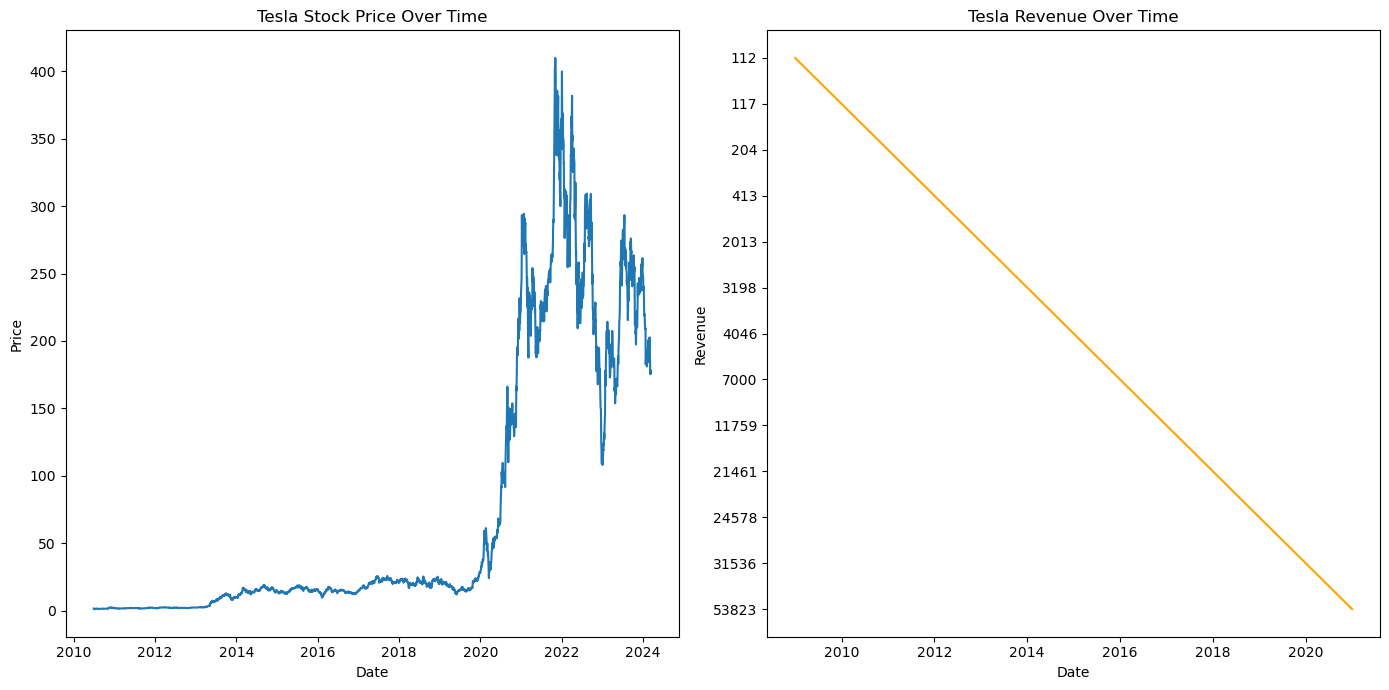

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Assuming tesla_data is your stock DataFrame and tesla_revenue_df is your revenue DataFrame
# Plotting Tesla stock prices
plt.subplot(1, 2, 1)  # 1 row, 2 cols, 1st subplot
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Stock Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting Tesla revenue
plt.subplot(1, 2, 2)  # 1 row, 2 cols, 2nd subplot
plt.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'], label='Revenue', color='orange')
plt.title('Tesla Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


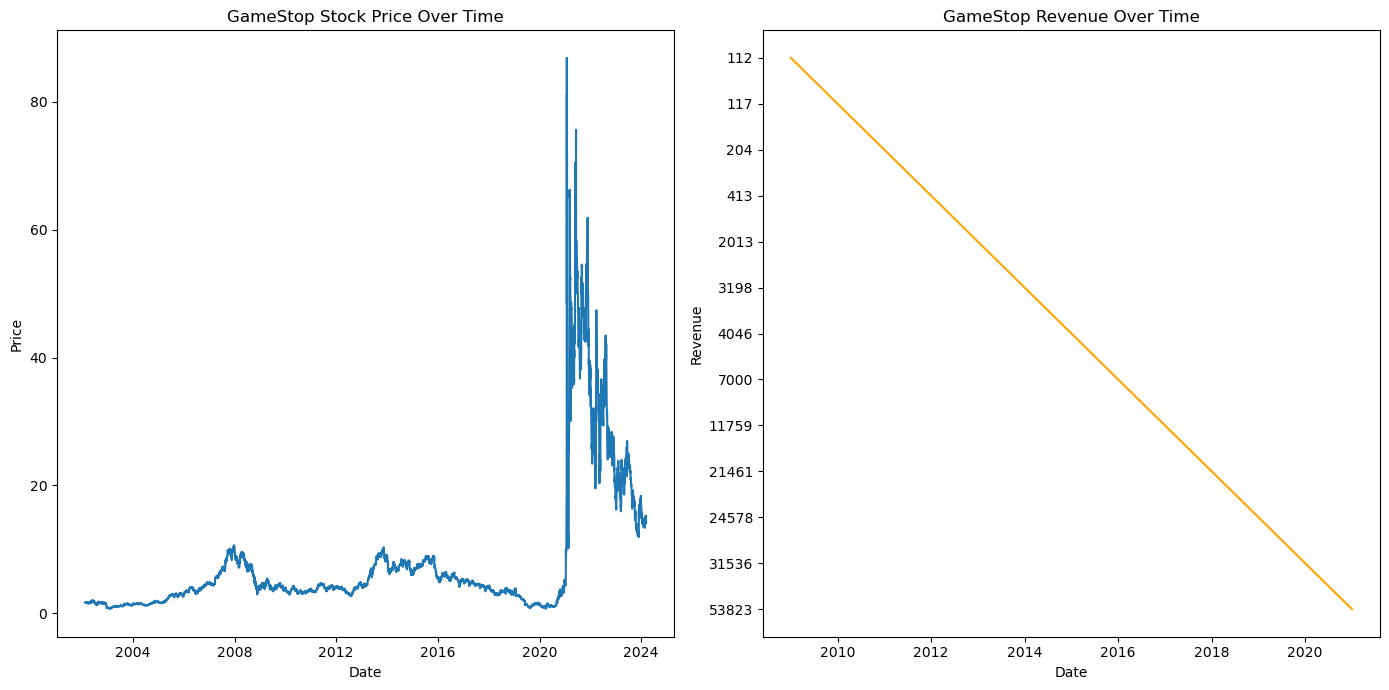

In [27]:
plt.figure(figsize=(14, 7))

# Plotting GameStop stock prices
plt.subplot(1, 2, 1)
plt.plot(gme_data['Date'], gme_data['Close'], label='Stock Price')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Plotting GameStop revenue
plt.subplot(1, 2, 2)
plt.plot(gme_revenue_df['Date'], gme_revenue_df['Revenue'], label='Revenue', color='orange')
plt.title('GameStop Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
